In [1]:
from Analyzor.DataFactory import DataFactory
from Analyzor import VertexAnalyzor
import pylab as plt
import matplotlib.path as mplPath
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)


In [2]:
dp = DataFactory('data/SQL/10C/0085_0005.db','data/SQL/10C/ProtoMap.db')

0085_0005 initialization will take some time
0085_0005loading finished
0085_0005 begin processing
0085_0005 processing finished


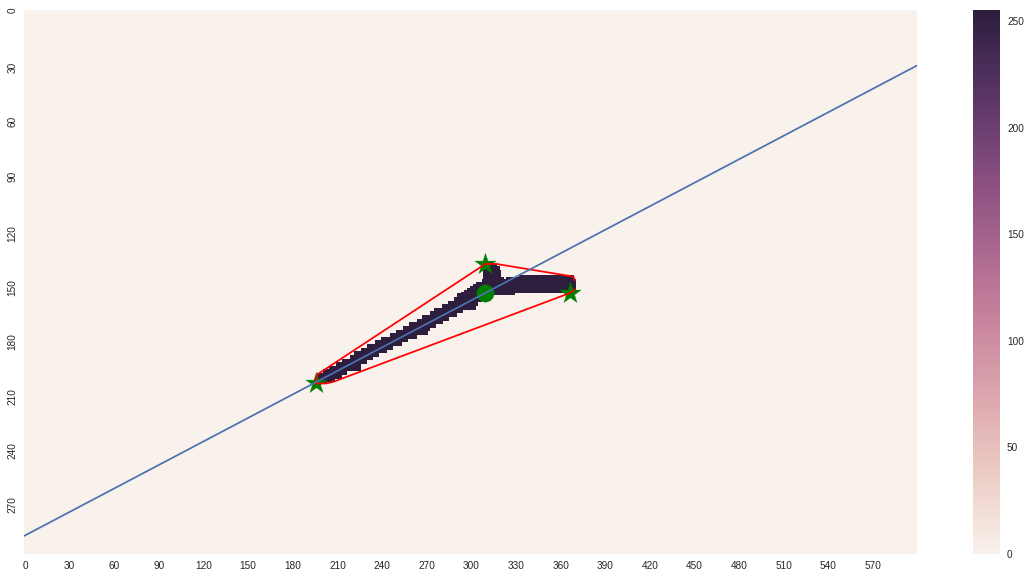

In [18]:
fig = plt.figure(figsize=(20,10))

image = dp.ConstructImage(809)
image = VertexAnalyzor.FilterBackground(image)
points,(xc,yc) = VertexAnalyzor.GetEventPositions(image,1)


r = VertexAnalyzor.GetEventInfo(points,(xc,yc))


In [ ]:
[   5,   24,   59,  101,  175,  181,  195,  207,  307,  382,  420,
        439,  480,  557,  569,  578,  591,  666,  679,  737,  756,  757,
        763,  772,  785,  865,  877,  892,  915,  974,  992,  997, 1152,
       1211, 1254, 1260, 1270, 1279, 1281, 1285, 1421, 1431, 1460, 1484,
       1505, 1551, 1563, 1696, 1704, 1708, 1709, 1741, 1764, 1770, 1789,
       1887]

[  16,   58,   77,   81,   84,   88,  154,  158,  163,  202,  210,
        217,  218,  265,  269,  338,  357,  370,  387,  392,  405,  442,
        483,  484,  503,  510,  535,  536,  583,  584,  595,  613,  641,
        739,  816,  823,  842,  855,  893,  921,  987,  988, 1034, 1052,
       1055, 1066, 1070, 1085, 1123, 1148, 1159, 1181, 1196, 1215, 1225,
       1245, 1269, 1294, 1316, 1323, 1324, 1371, 1448, 1468, 1470, 1482,
       1486, 1493, 1498, 1521, 1556, 1571, 1584, 1590, 1642, 1656, 1661,
       1671, 1679, 1711, 1712, 1767, 1795, 1812, 1852, 1860, 1876, 1889,
       1901, 1902, 1920, 1922, 1924]

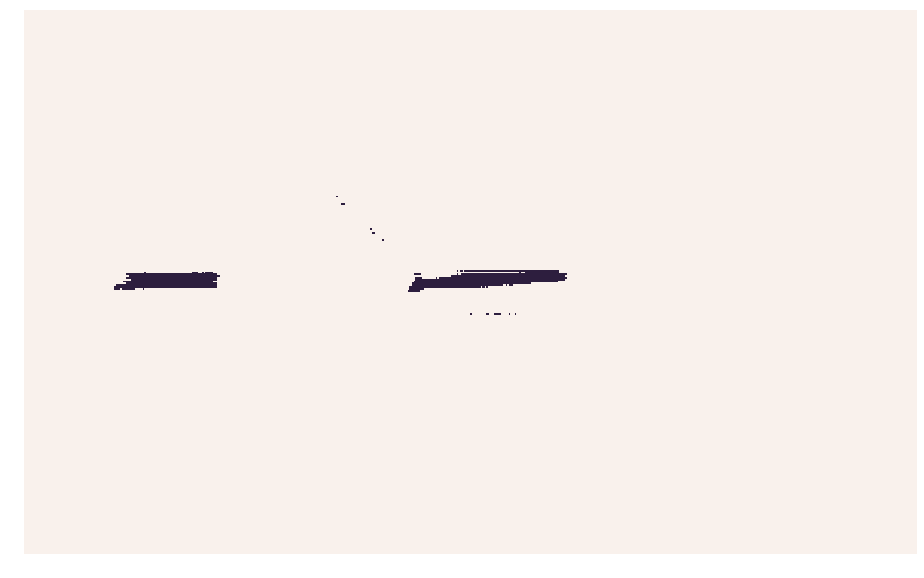

In [7]:
fig = plt.figure(figsize=(20,10))

thresh,image1,image2,image,image_ = dp.ConstructImage(6)
sns.heatmap(np.where(image2[::-1]>125,255,0), xticklabels=30, yticklabels=30)

plt.axis('off')
fig.delaxes(fig.axes[1]) 

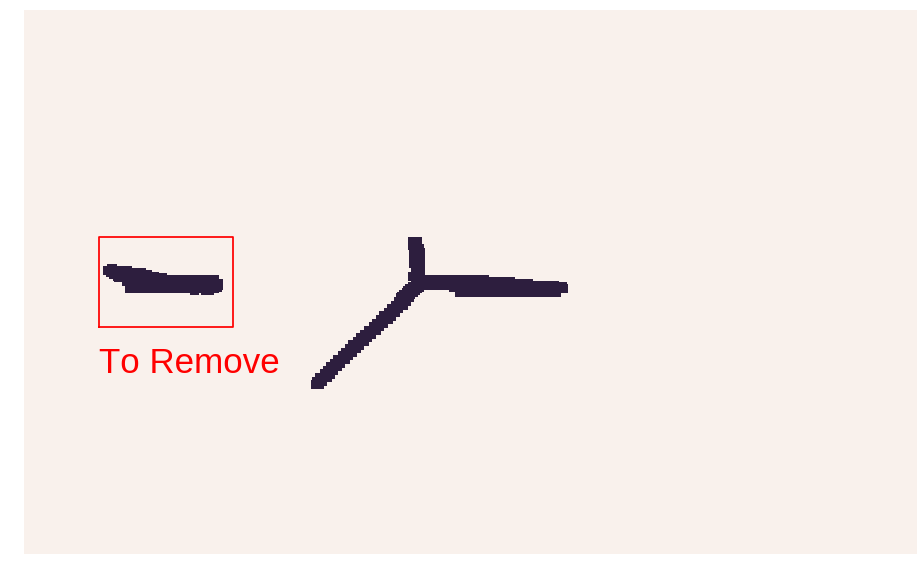

In [3]:
fig = plt.figure(figsize=(20,10))

image = dp.ConstructImage(6)
sns.heatmap(image[::-1], xticklabels=30, yticklabels=30)

plt.plot([50,140,140,50,50],[125,125,175,175,125],c='r')
#image = VertexAnalyzor.FilterBackground(image)
plt.gca().text(50, 100, u'To Remove',fontsize=35,color = 'r')



#points,(xc,yc) = VertexAnalyzor.GetEventPositions(image,1)


plt.axis('off')
fig.delaxes(fig.axes[1]) 

#p = np.concatenate([points,np.array([(xc,yc)])])
#plt.scatter(*points.T,marker='*',s=1000)

#r = VertexAnalyzor.GetEventInfo(points,(xc,yc))
#print r
#x,y = r[-2:]
#plt.scatter([xc],[yc],s=1000)
#print r
#r = VertexAnalyzor.GetRange(image,1)

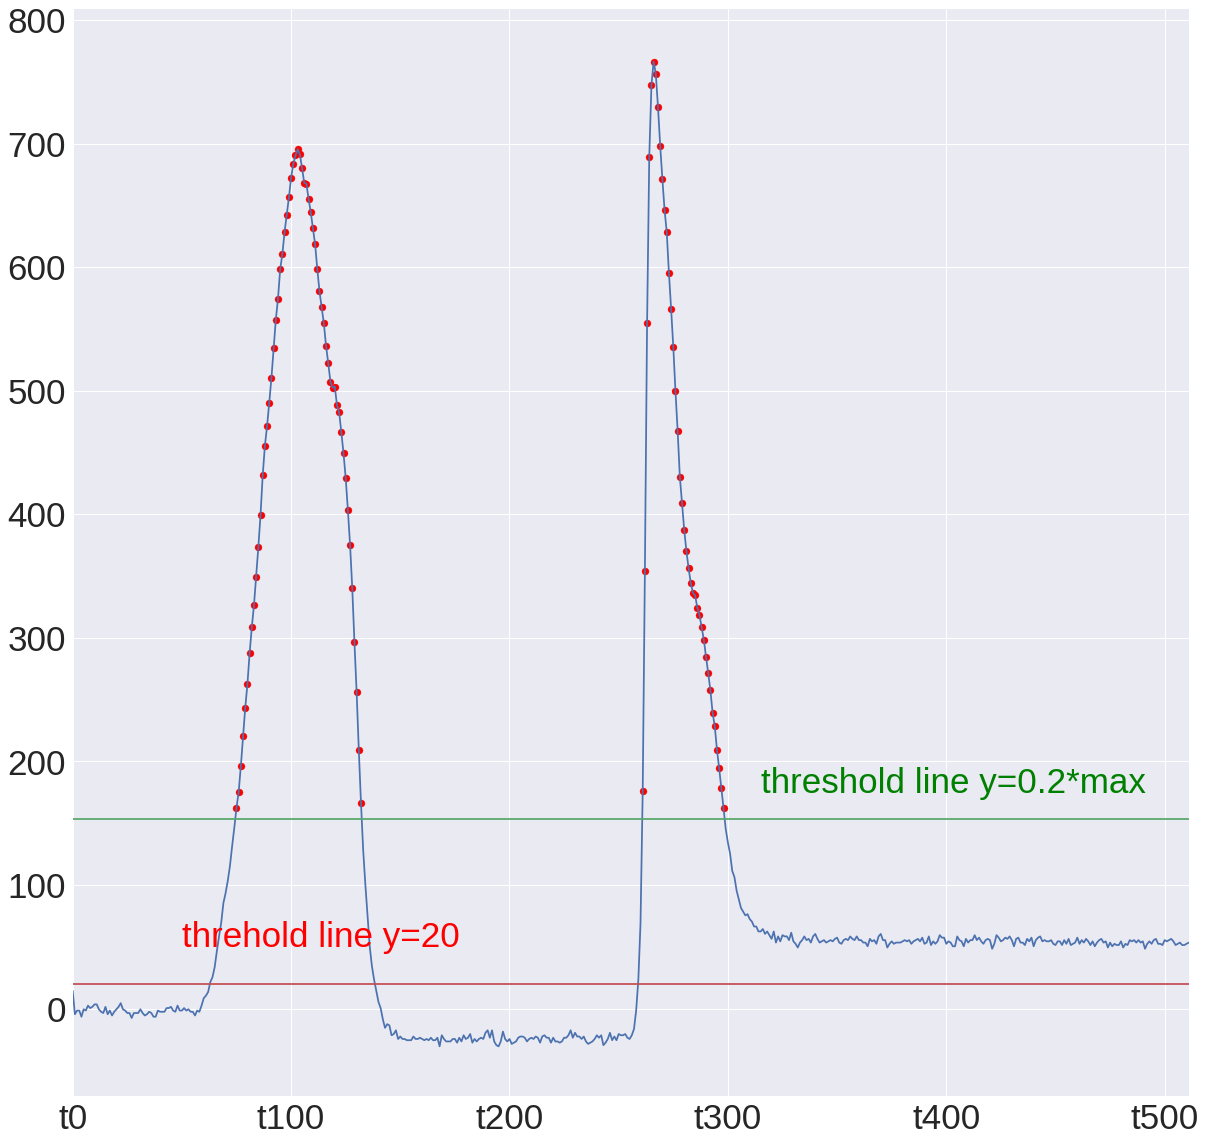

In [80]:
ADCdf = dp.ADCdf
tmp = ADCdf[(ADCdf['EventID']==6)&(ADCdf['PadNum']==2)].iloc[0,3:].copy()

x = [int(x[1:]) for x in tmp[(tmp>20) & (tmp.gt(tmp.max()*0.2))].index]
y = tmp[(tmp>20) & (tmp.gt(tmp.max()*0.2))].values
tmp.plot()
plt.scatter(x,y,c='r')
plt.plot([0,512],[tmp.max()*0.2,tmp.max()*0.2])
plt.plot([0,512],[20,20])

plt.gca().text(50, 50, u'threhold line y=20',fontsize=35,color = 'r')
plt.gca().text(315, 175, u'threshold line y=0.2*max',fontsize=35,color = 'g')
#plt.axis('off')

plt.tick_params(axis='both', which='major', labelsize=35)


In [3]:
import inspect

In [9]:
dir(dp)   


['ADCdf',
 'ADCdfn',
 'ConstructImage',
 'ProtoMapdf',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'fname',
 't3']

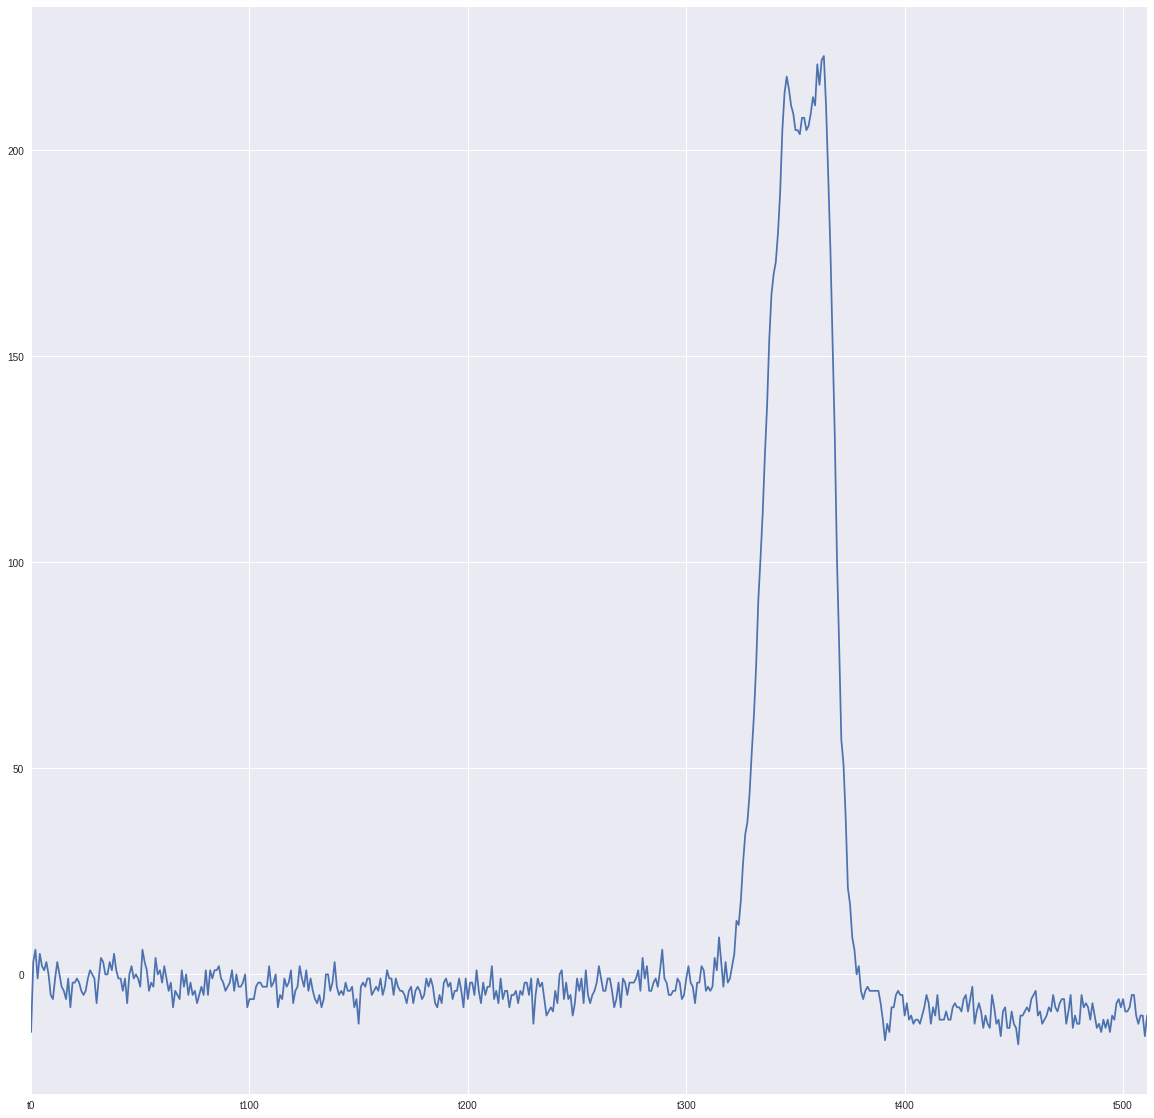

In [22]:
def GetTrace(EventID,PadNum):
    ADCdf = dp.ADCdf
    mask = (ADCdf['EventID']==EventID)&(ADCdf['PadNum']==PadNum)
    return ADCdf[mask].iloc[0]
tr = GetTrace(0,0)
tr.iloc[3:].plot()

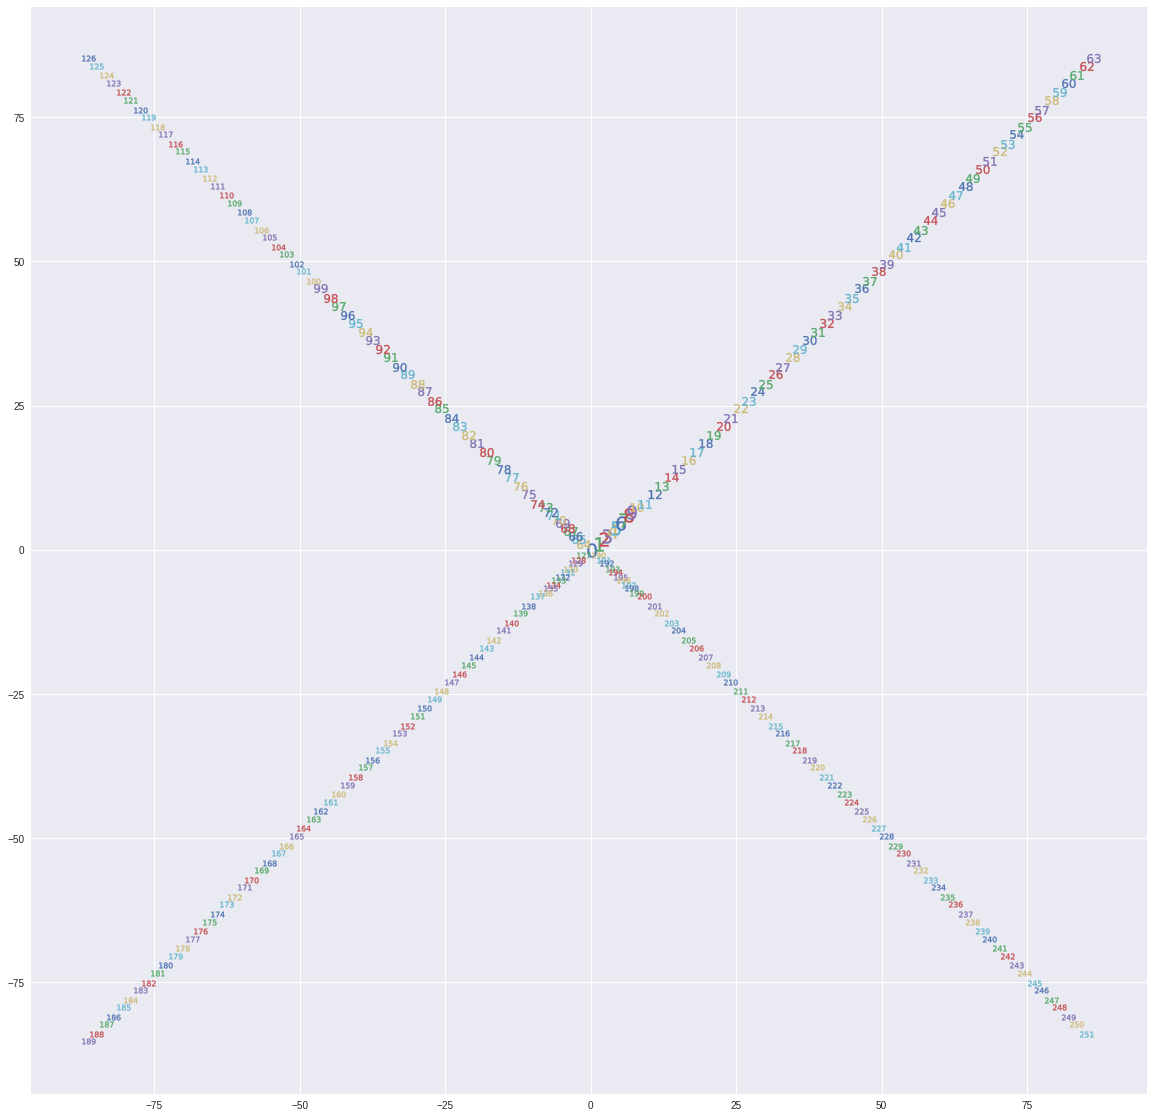

In [27]:
def plotMap():
    ProtoMapdf = dp.ProtoMapdf
    plt.figure()
    for row in ProtoMapdf.iloc[:252].iterrows():
        plt.scatter(row[1]['PadX'],row[1]['PadY'],marker='${}$'.format(row[1]['PadNum']),s=200) 

plotMap()